## Import the data

In [1]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
import numpy as np
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("Property_Listing_Details_Dataset.csv")

## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870122 entries, 0 to 870121
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listing_uid                          870122 non-null  int64  
 1   locality_name                        870122 non-null  object 
 2   listing_launch_date                  558781 non-null  object 
 3   listing_total_units                  870122 non-null  int64  
 4   listing_show_price_sqft              870122 non-null  int64  
 5   unit_summary_history_bedrooms        803457 non-null  float64
 6   unit_summary_history_property_type   870122 non-null  int64  
 7   listing_company                      870122 non-null  int64  
 8   unit_summary_history_price_per_sqft  870122 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 59.7+ MB


In [4]:
df.isna().sum()

listing_uid                                 0
locality_name                               0
listing_launch_date                    311341
listing_total_units                         0
listing_show_price_sqft                     0
unit_summary_history_bedrooms           66665
unit_summary_history_property_type          0
listing_company                             0
unit_summary_history_price_per_sqft         0
dtype: int64

In [5]:
df.describe()

,listing_uid,listing_total_units,listing_show_price_sqft,unit_summary_history_bedrooms,unit_summary_history_property_type,listing_company,unit_summary_history_price_per_sqft
count,870122.000000,870122.000000,870122.000000,803457.000000,870122.000000,870122.000000,870122.000000
mean,13985.374913,112.407622,0.999217,2.387912,1.472276,2125.274934,6691.222661
std,12683.150872,623.489650,0.027965,0.859648,1.348119,1498.780733,7518.508277
min,1.000000,0.000000,0.000000,0.500000,1.000000,1.000000,-93500.000000
25%,3485.250000,0.000000,1.000000,2.000000,1.000000,897.000000,3500.000000
50%,7187.000000,0.000000,1.000000,2.000000,1.000000,1796.000000,4549.000000
75%,23398.000000,80.000000,1.000000,3.000000,1.000000,3139.000000,6789.000000
max,44415.000000,60000.000000,1.000000,7.000000,6.000000,7243.000000,1000000.000000


## Removing duplicates

In [6]:
df = df.drop_duplicates(subset=['listing_uid'], keep='last')
df = df.reset_index(drop=True)
df.describe()

,listing_uid,listing_total_units,listing_show_price_sqft,unit_summary_history_bedrooms,unit_summary_history_property_type,listing_company,unit_summary_history_price_per_sqft
count,29071.000000,29071.000000,29071.000000,26116.000000,29071.000000,29071.000000,29071.000000
mean,23645.234564,66.787176,0.998314,2.210369,1.588490,2832.120636,7267.580888
std,14295.405054,427.970974,0.041021,0.738541,1.520371,1820.324651,10248.639813
min,1.000000,0.000000,0.000000,0.500000,1.000000,1.000000,-93400.000000
25%,8099.500000,0.000000,1.000000,2.000000,1.000000,1284.500000,3390.000000
50%,25534.000000,0.000000,1.000000,2.000000,1.000000,2885.000000,4800.000000
75%,36985.500000,33.000000,1.000000,2.000000,1.000000,4026.000000,7800.000000
max,44415.000000,60000.000000,1.000000,7.000000,6.000000,7243.000000,1000000.000000


## Removing unwanted columns and outliers

In [7]:
df = df.drop(['listing_launch_date', 'listing_show_price_sqft',"listing_total_units","unit_summary_history_property_type"], axis=1)
df

,listing_uid,locality_name,unit_summary_history_bedrooms,listing_company,unit_summary_history_price_per_sqft
0,195,Kundalahalli,2.0,2098,3700
1,386,Whitefield,2.0,2098,2700
2,667,Hennur,4.0,1874,8000
3,2592,Hoskote,NaN,2098,1250
4,3691,Kadugodi,2.0,2098,2700
...,...,...,...,...,...
29066,44410,Kharadi,1.0,3514,0
29067,44411,Brigade Road,4.0,517,5000
29068,44414,Alwarpet,1.0,646,1000
29069,44415,Ambattur,4.0,2845,800


In [8]:
df_clean = df[(np.abs(stats.zscore(df["unit_summary_history_price_per_sqft"])) < 3)]
df_cleaner = df_clean.drop(df_clean[df_clean['unit_summary_history_price_per_sqft'] < 1000].index)
df_cleaner

,listing_uid,locality_name,unit_summary_history_bedrooms,listing_company,unit_summary_history_price_per_sqft
0,195,Kundalahalli,2.0,2098,3700
1,386,Whitefield,2.0,2098,2700
2,667,Hennur,4.0,1874,8000
3,2592,Hoskote,NaN,2098,1250
4,3691,Kadugodi,2.0,2098,2700
...,...,...,...,...,...
29063,44398,Yamuna Vihar,5.0,5155,3651
29064,44399,Yamuna Vihar,5.0,7161,2850
29067,44411,Brigade Road,4.0,517,5000
29068,44414,Alwarpet,1.0,646,1000


In [9]:
df_cleaner.nunique()

listing_uid                            25803
locality_name                           1507
unit_summary_history_bedrooms             12
listing_company                         5510
unit_summary_history_price_per_sqft     5831
dtype: int64

## Removing outliers with quantiles
low = df["unit_summary_history_price_per_sqft"].quantile(0.01)

high  = df["unit_summary_history_price_per_sqft"].quantile(0.99)

df_filtered = df[(df["unit_summary_history_price_per_sqft"] < high) & (df["unit_summary_history_price_per_sqft"] > low)]

df_filtered

df_filtered.describe()

## Avg count of listing per company

In [10]:
listing_per_company = df_cleaner.groupby(['listing_company']).size()
listing_per_company.describe()

count    5510.000000
mean        4.682940
std         6.393054
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       115.000000
dtype: float64

## Listings based on number of rooms

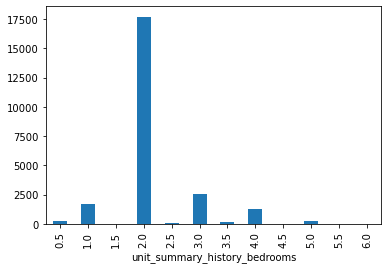

In [11]:
listing_by_room = df_cleaner.groupby(['unit_summary_history_bedrooms']).size()
listing_by_room.plot(kind="bar");

In [12]:
listing_by_room = listing_by_room.sort_values(ascending=False) 
listing_by_room

unit_summary_history_bedrooms
2.0    17707
3.0     2563
1.0     1734
4.0     1309
5.0      272
0.5      227
3.5      180
2.5       91
4.5       13
1.5       12
6.0        5
5.5        1
dtype: int64

## Listing density

In [13]:
listing_by_city = df_cleaner.groupby(['locality_name']).size()
listing_by_city = listing_by_city.sort_values(ascending=False) 
listing_by_city.head(10)

locality_name
Electronic City      209
Off Sarjapur Road    207
Medavakkam           205
Talegaon Dabhade     197
Andheri West         193
New Panvel           190
Mira Road            180
Madipakkam           179
Borivali West        177
Panvel               175
dtype: int64

## Most and least expensive places by sq ft price

In [14]:
avg_price = df_cleaner.groupby(["locality_name"]).mean()
avg_price = avg_price.sort_values(["unit_summary_history_price_per_sqft"],ascending=False) 
avg_price.head(15)

,listing_uid,unit_summary_history_bedrooms,listing_company,unit_summary_history_price_per_sqft
locality_name,,,,
Abhyudaya Nagar,21162.000000,3.000000,3494.000000,36000.000000
Ranwar,44317.000000,2.500000,3528.000000,33384.000000
Siddharth Nagar - Worli,18638.200000,2.600000,2858.400000,33186.000000
Gulmohar Road,37070.000000,3.000000,3076.000000,32394.000000
St. Peter's Colony,19788.000000,3.000000,3279.000000,32092.000000
Century Bazaar,16595.000000,2.000000,2678.000000,32000.000000
Pirojshanagar,16574.000000,2.750000,653.000000,31904.500000
Dalal Estate,21284.000000,3.000000,3510.500000,31555.000000
Upper Worli,27274.500000,3.321429,3588.642857,31429.428571


In [15]:
avg_price.tail(15)

,listing_uid,unit_summary_history_bedrooms,listing_company,unit_summary_history_price_per_sqft
locality_name,,,,
Baiyyappanahalli,6028.0,NaN,1047.0,1400.0
Bhongir,43217.0,NaN,6934.5,1400.0
Rampally,3370.0,NaN,518.0,1300.0
Veerakeralam,7381.0,NaN,2625.0,1261.0
Kapuluppada,5060.0,NaN,1444.0,1250.0
Thavarekere-Magadi Road,23196.6,NaN,4103.0,1247.6
Madhuranthagam,28904.0,NaN,4433.0,1200.0
Karamadai,7687.0,NaN,2619.0,1200.0
Machavaram,2535.0,NaN,143.0,1162.0


## Conclusions
- 26k unique property listings between 1.5k localities
- A builder has listing for an average of 5 projects with a minimum of a single listing and a maximum of 115.
- Builders prefered 2BHK listing more with 17k listings. 3BHK apartments were a distant second with only 2.5k listings.
- Top 2 localities with highest listing belonged to BLR with each area accomodating ~200 listings
- Mumbai dominates in being the most expensive city to live in while Chennai saw itself the least expensive.